In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import xlrd
import re

import warnings
warnings.filterwarnings('ignore')


# DATASET: QVI_purchase_behaviour

In [2]:
purchase = pd.read_csv('QVI_purchase_behaviour.csv')

In [3]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
purchase.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [5]:
#check details 
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
#check for Missing values
purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [7]:
#check for duplicate values
purchase.duplicated().sum()

0

In [8]:
#check sum of rows and columns
purchase.shape

(72637, 3)

In [9]:
# Check type of customers 
customers_type = purchase["PREMIUM_CUSTOMER"].value_counts()
customers_type

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

<AxesSubplot:xlabel='PREMIUM_CUSTOMER', ylabel='count'>

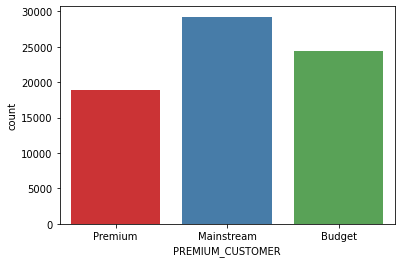

In [10]:
sns.countplot(x="PREMIUM_CUSTOMER", data=purchase, palette="Set1")

# DATASET: QVI_transaction_data

In [11]:
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')

In [12]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [13]:
#check for Missing values 
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [14]:
#check for Duplicate values
transaction_data.duplicated().sum()

1

In [15]:
transaction_data[transaction_data.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [16]:
#drop Duplicate value
transaction_data.drop_duplicates(inplace=True)

In [17]:
#check again for missing values
transaction_data.duplicated().sum()

0

In [18]:
#check info of dataframe
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264835 non-null  int64  
 1   STORE_NBR       264835 non-null  int64  
 2   LYLTY_CARD_NBR  264835 non-null  int64  
 3   TXN_ID          264835 non-null  int64  
 4   PROD_NBR        264835 non-null  int64  
 5   PROD_NAME       264835 non-null  object 
 6   PROD_QTY        264835 non-null  int64  
 7   TOT_SALES       264835 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 18.2+ MB


In [19]:
#checking details
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835.000000,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,43464.036600,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205
std,105.389336,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


## Checking for any Outliers

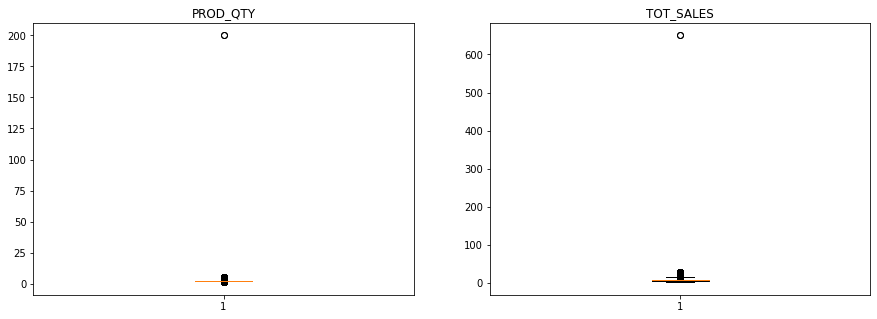

In [20]:
#Checking fr any outliers in the dataframe using a box plot of theo PROD_QTY and TOT_SALES column.
figure, axis=plt.subplots(1, 2, figsize=(15, 5))
axis[0].boxplot(transaction_data["PROD_QTY"])
axis[1].boxplot(transaction_data["TOT_SALES"])
axis[0].set_title("PROD_QTY")
axis[1].set_title("TOT_SALES")
plt.show()

In [21]:
transaction_data[transaction_data['PROD_QTY'] > 100]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [22]:
transaction_data[transaction_data['TOT_SALES'] > 100]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [23]:
#Removing Outliers from the dataframe
transaction_data = transaction_data[transaction_data['PROD_QTY'] < 100]
transaction_data = transaction_data[transaction_data['TOT_SALES'] < 500]
transaction_data = transaction_data.reset_index(drop=True)
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264828,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264829,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264830,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264831,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


## Converting the Microsoft Excel serial date format to the datetime format.

In [24]:
#Storing the date column as list
date = transaction_data["DATE"].tolist()
#Converting the Microsoft Excel serial date format to the datetime format.
for i in range(len(date)):
    date[i] = xlrd.xldate_as_datetime(date[i], 0)
    
transaction_data["DATE"] = date
transaction_data


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264828,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264829,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264830,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264831,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [25]:
# Make copy of each dataframe
transaction_data_copy = transaction_data.copy()
customers_data_copy = purchase.copy()

# Merging two dataframes


In [26]:
customers_transaction = pd.merge(transaction_data_copy, customers_data_copy, on='LYLTY_CARD_NBR')
customers_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [27]:
customers_transaction.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 264833 entries, 0 to 264832
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264833 non-null  datetime64[ns]
 1   STORE_NBR         264833 non-null  int64         
 2   LYLTY_CARD_NBR    264833 non-null  int64         
 3   TXN_ID            264833 non-null  int64         
 4   PROD_NBR          264833 non-null  int64         
 5   PROD_NAME         264833 non-null  object        
 6   PROD_QTY          264833 non-null  int64         
 7   TOT_SALES         264833 non-null  float64       
 8   LIFESTAGE         264833 non-null  object        
 9   PREMIUM_CUSTOMER  264833 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


In [28]:
customers_transaction.shape

(264833, 10)

In [29]:
#Extract Pack_Size from PROD_NAME column
customers_transaction["PACK_SIZE"] = customers_transaction["PROD_NAME"].str.extract("(\d+)")
customers_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170


In [30]:
customers_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264833 entries, 0 to 264832
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264833 non-null  datetime64[ns]
 1   STORE_NBR         264833 non-null  int64         
 2   LYLTY_CARD_NBR    264833 non-null  int64         
 3   TXN_ID            264833 non-null  int64         
 4   PROD_NBR          264833 non-null  int64         
 5   PROD_NAME         264833 non-null  object        
 6   PROD_QTY          264833 non-null  int64         
 7   TOT_SALES         264833 non-null  float64       
 8   LIFESTAGE         264833 non-null  object        
 9   PREMIUM_CUSTOMER  264833 non-null  object        
 10  PACK_SIZE         264833 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 24.2+ MB


In [31]:
#Change PACK_SIZE to integer 
customers_transaction["PACK_SIZE"] = pd.to_numeric(customers_transaction["PACK_SIZE"])
customers_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264833 entries, 0 to 264832
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264833 non-null  datetime64[ns]
 1   STORE_NBR         264833 non-null  int64         
 2   LYLTY_CARD_NBR    264833 non-null  int64         
 3   TXN_ID            264833 non-null  int64         
 4   PROD_NBR          264833 non-null  int64         
 5   PROD_NAME         264833 non-null  object        
 6   PROD_QTY          264833 non-null  int64         
 7   TOT_SALES         264833 non-null  float64       
 8   LIFESTAGE         264833 non-null  object        
 9   PREMIUM_CUSTOMER  264833 non-null  object        
 10  PACK_SIZE         264833 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 24.2+ MB


In [32]:
customers_transaction["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g', 'WW Original Stacked Chips 160g',
       'CCs Original 175g', 'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Tyrrells Crisps     Lightly Salted 165g',
       'Kettle Tortilla ChpsFeta&Garlic 150g',
       'Dorito Corn Chp     Supreme 380g', 'Doritos Mexicana    170g',
       'Smiths Crinkle Chips Salt & Vinegar 330g', 'Kettle Original 175g',
       'Tyrrells Crisps     Ched & Chives 165g',
       'Infuzions BBQ Rib   Prawn Crackers 110g',
       'Grain Waves         Sweet Chilli 210g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Thins Potato Chips  Hot & Spicy 175g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Red Rock Deli Thai  Chilli&Lime 150g',
       'GrnWves Plus Btroot

In [33]:
#check how many unique PROD_NAME
len(customers_transaction["PROD_NAME"].unique())

114

In [34]:
#Clean PROD_NAME column text
#removing special characters like '&' and '/'
#removing Product weights
def clean_text(text):
    text = re.sub('[&/]', ' ', text)
    text = re.sub('\d\w*', ' ', text)
    return text
#Applying to PROD_NAME column
customers_transaction["PROD_NAME"] = customers_transaction["PROD_NAME"].apply(clean_text)

In [35]:
customers_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170


In [36]:
#Arranging Order of columns
customers_transaction=customers_transaction.loc[:, ["DATE", "STORE_NBR", "LYLTY_CARD_NBR", "TXN_ID", "PROD_NBR", "PROD_NAME", "PACK_SIZE", "PROD_QTY", "TOT_SALES", "LIFESTAGE", "PREMIUM_CUSTOMER"]] 
customers_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,175,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,160,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,175,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
264828,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,175,2,10.8,YOUNG SINGLES/COUPLES,Premium
264829,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,175,1,4.4,YOUNG SINGLES/COUPLES,Premium
264830,2018-11-06,272,272379,270187,51,Doritos Mexicana,170,2,8.8,YOUNG SINGLES/COUPLES,Premium
264831,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,150,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [37]:
customers_transaction.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PACK_SIZE           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [38]:
#Sorting the dataframe in Ascending order by date column
customers_transaction = customers_transaction.sort_values("DATE")
#resseting the index of dataframe
customers_transaction = customers_transaction.reset_index(drop=True)
customers_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PACK_SIZE,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,160,160202,161403,93,Doritos Corn Chip Southern Chicken,150,2,7.8,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-01,168,168215,170691,60,Kettle Tortilla ChpsFeta Garlic,150,2,9.2,YOUNG FAMILIES,Budget
2,2018-07-01,109,109019,110294,34,Pringles Slt Vingar,134,2,7.4,RETIREES,Mainstream
3,2018-07-01,89,89003,88123,6,RRD Lime Pepper,165,1,3.0,OLDER SINGLES/COUPLES,Mainstream
4,2018-07-01,176,176054,177009,7,Smiths Crinkle Original,330,1,5.7,YOUNG FAMILIES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
264828,2019-06-30,49,49028,44666,17,Kettle Sensations BBQ Maple,150,2,9.2,YOUNG SINGLES/COUPLES,Budget
264829,2019-06-30,165,165004,165406,49,Infuzions SourCream Herbs Veg Strws,110,2,7.6,YOUNG FAMILIES,Premium
264830,2019-06-30,164,164218,165147,45,Smiths Thinly Cut Roast Chicken,175,2,6.0,YOUNG FAMILIES,Premium
264831,2019-06-30,220,220032,219497,4,Dorito Corn Chp Supreme,380,2,13.0,RETIREES,Budget


In [39]:
#checking for missing values in date column
pd.date_range(start="2018-07-01", end="2019-06-30").difference(customers_transaction["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

We can see that there is no sales on 2018-12-25 which is public holiday/Christmas.

In [40]:
#Creating Brand_Names using first word of PROD_NAME column
customers_transaction["BRAND_NAME"] = customers_transaction["PROD_NAME"].str.split().str.get(0)
#Arranging Order of columns Again
customers_transaction=customers_transaction.loc[:, ["DATE", "STORE_NBR", "LYLTY_CARD_NBR", "TXN_ID", "PROD_NBR", "PROD_NAME", "PACK_SIZE", "BRAND_NAME", "PROD_QTY", "TOT_SALES", "LIFESTAGE", "PREMIUM_CUSTOMER"]] 
customers_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PACK_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,160,160202,161403,93,Doritos Corn Chip Southern Chicken,150,Doritos,2,7.8,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-01,168,168215,170691,60,Kettle Tortilla ChpsFeta Garlic,150,Kettle,2,9.2,YOUNG FAMILIES,Budget
2,2018-07-01,109,109019,110294,34,Pringles Slt Vingar,134,Pringles,2,7.4,RETIREES,Mainstream
3,2018-07-01,89,89003,88123,6,RRD Lime Pepper,165,RRD,1,3.0,OLDER SINGLES/COUPLES,Mainstream
4,2018-07-01,176,176054,177009,7,Smiths Crinkle Original,330,Smiths,1,5.7,YOUNG FAMILIES,Budget


In [41]:
customers_transaction.BRAND_NAME.unique()

array(['Doritos', 'Kettle', 'Pringles', 'RRD', 'Smiths', 'Infuzions',
       'Tostitos', 'Thins', 'WW', 'Twisties', 'Woolworths', 'CCs',
       'Sunbites', 'Grain', 'Old', 'Cheezels', 'Infzns', 'NCC',
       'Tyrrells', 'Cheetos', 'Red', 'Smith', 'Natural', 'Cobs', 'Dorito',
       'GrnWves', 'Burger', 'French', 'Snbts'], dtype=object)

In [42]:
# Create a function to identify the string replacements needed to avoid double BRAND_NAMES in the column.
def replace_brandname(line):
    name = line['BRAND_NAME']
    if name == "Infzns":
        return "Infuzions"
    elif name == "Red":
        return "Red Rock Deli"
    elif name == "RRD":
        return "Red Rock Deli"
    elif name == "Grain":
        return "Grain Waves"
    elif name == "GrnWves":
        return "Grain Waves"
    elif name == "Snbts":
        return "Sunbites"
    elif name == "Natural":
        return "Natural Chip Co"
    elif name == "NCC":
        return "Natural Chip Co"
    elif name == "WW":
        return "Woolworths"
    elif name == "Smith":
        return "Smiths"
    elif name == "Dorito":
        return "Doritos"
    else:
        return name 

# Then apply the function to clean the brand names
customers_transaction["BRAND_NAME"] = customers_transaction.apply(lambda line: replace_brandname(line), axis=1)

# Check that there are no duplicate brands 
customers_transaction["BRAND_NAME"].unique()

array(['Doritos', 'Kettle', 'Pringles', 'Red Rock Deli', 'Smiths',
       'Infuzions', 'Tostitos', 'Thins', 'Woolworths', 'Twisties', 'CCs',
       'Sunbites', 'Grain Waves', 'Old', 'Cheezels', 'Natural Chip Co',
       'Tyrrells', 'Cheetos', 'Cobs', 'Burger', 'French'], dtype=object)

In [43]:
# Adding an entry for the missing date in the DataFrame.
customers_transaction=customers_transaction.append({"DATE": pd.to_datetime("2018-12-25"), "STORE_NBR": 0, "LYLTY_CARD_NBR": 0, "TXN_ID": 0, "PROD_NBR": 0, "PROD_NAME": "None", "BRAND_NAME": "None", "PACK_SIZE": "0g", "PROD_QTY": 0, "TOT_SALES": 0, "LIFESTAGE": "None", "PREMIUM_CUSTOMER": "None"}, ignore_index=True)
# Sorting the DataFrame in ascending order of the DATE column.
customers_transaction=customers_transaction.sort_values(by="DATE")
# Resetting the index of the DataFrame.
customers_transaction=customers_transaction.reset_index(drop=True)  
customers_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PACK_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,160,160202,161403,93,Doritos Corn Chip Southern Chicken,150,Doritos,2,7.8,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-01,262,262071,261713,24,Grain Waves Sweet Chilli,210,Grain Waves,2,7.2,YOUNG SINGLES/COUPLES,Budget
2,2018-07-01,58,58072,53145,99,Pringles Sthrn FriedChicken,134,Pringles,2,7.4,OLDER SINGLES/COUPLES,Premium
3,2018-07-01,33,33160,30468,40,Thins Chips Seasonedchicken,175,Thins,2,6.6,OLDER SINGLES/COUPLES,Premium
4,2018-07-01,9,9341,8808,45,Smiths Thinly Cut Roast Chicken,175,Smiths,2,6.0,RETIREES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-06-30,102,102220,102876,45,Smiths Thinly Cut Roast Chicken,175,Smiths,2,6.0,YOUNG FAMILIES,Budget
264830,2019-06-30,102,102165,102530,22,Thins Chips Originl saltd,175,Thins,2,6.6,YOUNG SINGLES/COUPLES,Premium
264831,2019-06-30,133,133121,136776,44,Thins Chips Light Tangy,175,Thins,2,6.6,OLDER FAMILIES,Mainstream
264832,2019-06-30,231,231079,234013,62,Pringles Mystery Flavour,134,Pringles,2,7.4,RETIREES,Premium


In [44]:
# Checking if the missing date has been added to the DataFrame.
customers_transaction.loc[customers_transaction["DATE"]=="2018-12-25"]  

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PACK_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
129323,2018-12-25,0,0,0,0,None,0g,None,0,0.0,None,None


In [45]:
#Changing column names PREMIUM_CUSTOMER to 'MEMBER_TYPE'  AND  change TOT_SALES to 'TOTAL_SALES' for better understanding
customers_transaction = customers_transaction.rename(columns={"PREMIUM_CUSTOMER":"MEMBER_TYPE"})
customers_transaction = customers_transaction.rename(columns={"TOT_SALES":"TOTAL_SALES"})
#Also renaming PACK_SIZE to 'PROD_SIZE'
customers_transaction = customers_transaction.rename(columns={"PACK_SIZE":"PROD_SIZE"})
customers_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOTAL_SALES,LIFESTAGE,MEMBER_TYPE
0,2018-07-01,160,160202,161403,93,Doritos Corn Chip Southern Chicken,150,Doritos,2,7.8,OLDER SINGLES/COUPLES,Mainstream
1,2018-07-01,262,262071,261713,24,Grain Waves Sweet Chilli,210,Grain Waves,2,7.2,YOUNG SINGLES/COUPLES,Budget
2,2018-07-01,58,58072,53145,99,Pringles Sthrn FriedChicken,134,Pringles,2,7.4,OLDER SINGLES/COUPLES,Premium
3,2018-07-01,33,33160,30468,40,Thins Chips Seasonedchicken,175,Thins,2,6.6,OLDER SINGLES/COUPLES,Premium
4,2018-07-01,9,9341,8808,45,Smiths Thinly Cut Roast Chicken,175,Smiths,2,6.0,RETIREES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-06-30,102,102220,102876,45,Smiths Thinly Cut Roast Chicken,175,Smiths,2,6.0,YOUNG FAMILIES,Budget
264830,2019-06-30,102,102165,102530,22,Thins Chips Originl saltd,175,Thins,2,6.6,YOUNG SINGLES/COUPLES,Premium
264831,2019-06-30,133,133121,136776,44,Thins Chips Light Tangy,175,Thins,2,6.6,OLDER FAMILIES,Mainstream
264832,2019-06-30,231,231079,234013,62,Pringles Mystery Flavour,134,Pringles,2,7.4,RETIREES,Premium


# VISUALIZING TOTAL SALES OVER TIME

In [46]:
# Grouping the DataFrame by the TOT_SALES column for each recorded date.
date_sales=customers_transaction.groupby("DATE")["TOTAL_SALES"].sum().reset_index()  
date_sales

,DATE,TOTAL_SALES
0,2018-07-01,5372.2
1,2018-07-02,5315.4
2,2018-07-03,5321.8
3,2018-07-04,5309.9
4,2018-07-05,5080.9
...,...,...
360,2019-06-26,5305.0
361,2019-06-27,5202.8
362,2019-06-28,5299.6
363,2019-06-29,5497.6


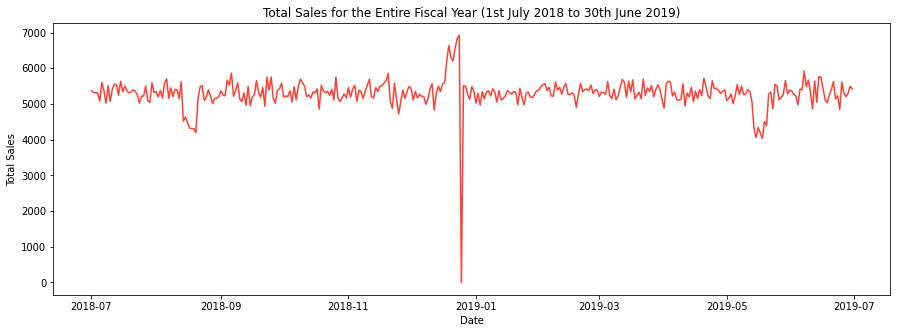

In [47]:
# Plotting a line graph of the total sales for each date over the entire recorded duration.
plt.figure(figsize=(15,5))
plt.plot(date_sales["DATE"], date_sales["TOTAL_SALES"], color="#ff3f34")
plt.title("Total Sales for the Entire Fiscal Year (1st July 2018 to 30th June 2019)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

As we can see from the line graph, the sales drop to zero on a certain date, which is 25th December 2018 — Christmas Day, which we manually set to zero. However, the sales also reached an all-time high right before that, so we would need to analyse the transaction data for December 2018 to find out more about the sales.

In [48]:
TOTAL_SALES_OVER_TIME = pd.pivot_table(customers_transaction, values = 'TOTAL_SALES', index = 'DATE', aggfunc = 'sum')
TOTAL_SALES_OVER_TIME.head()

,TOTAL_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [49]:
ALL_DATES = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
ALL_DATES['TOTAL_SALES'] = 0
COMPLETED_DATES = TOTAL_SALES_OVER_TIME + ALL_DATES
COMPLETED_DATES.head()

,TOTAL_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [50]:
#DECEMBER_SALES
december_sales = COMPLETED_DATES[(COMPLETED_DATES.index < "2019-01-01") & (COMPLETED_DATES.index > "2018-11-30")]
december_sales.head()

,TOTAL_SALES
DATE,
2018-12-01,5427.6
2018-12-02,5108.2
2018-12-03,5353.3
2018-12-04,5167.3
2018-12-05,5268.0


In [51]:
# adding 1 to start index date from 1st
december_sales.reset_index(drop=True,inplace=True)
december_sales["DATE"]=december_sales.index+1
december_sales.head()

,TOTAL_SALES,DATE
0,5427.6,1
1,5108.2,2
2,5353.3,3
3,5167.3,4
4,5268.0,5


<AxesSubplot:xlabel='DATE', ylabel='TOTAL_SALES'>

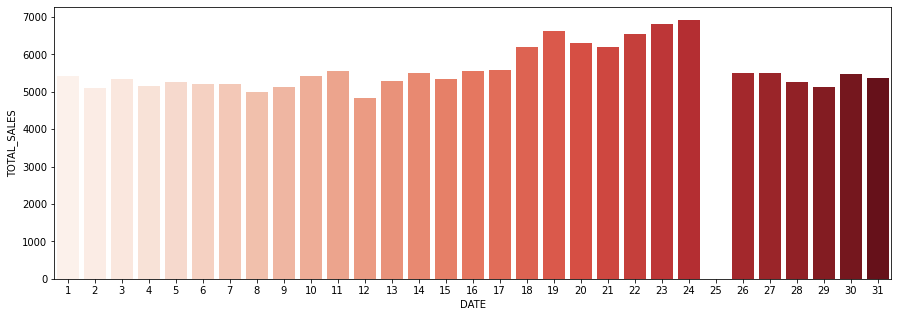

In [52]:
#Visualizing Detail December Sales
plt.figure(figsize = (15,5))
sns.barplot(x="DATE", y="TOTAL_SALES", data=december_sales, palette="Reds")

# LIFESTAGE ANALYSIS

In [53]:
customers_transaction.LIFESTAGE.value_counts()

OLDER SINGLES/COUPLES     54478
RETIREES                  49763
OLDER FAMILIES            48594
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
None                          1
Name: LIFESTAGE, dtype: int64

In [54]:
customers_sales = customers_transaction.groupby("LIFESTAGE")["TOTAL_SALES"].sum().reset_index().sort_values(by="TOTAL_SALES",ascending=False).head(7)
customers_sales = customers_sales.reset_index(drop=True)
customers_sales


,LIFESTAGE,TOTAL_SALES
0,OLDER SINGLES/COUPLES,402420.75
1,RETIREES,366470.90
2,OLDER FAMILIES,352467.20
3,YOUNG FAMILIES,316160.10
4,YOUNG SINGLES/COUPLES,260405.30
5,MIDAGE SINGLES/COUPLES,184751.30
6,NEW FAMILIES,50433.45


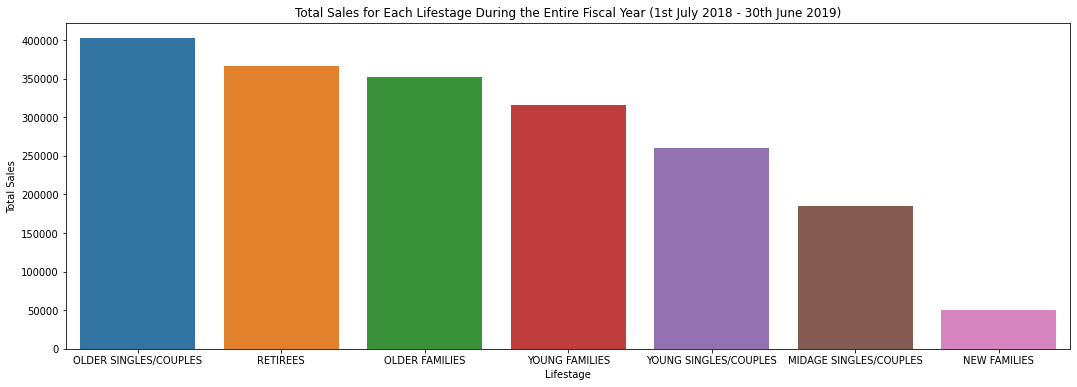

In [55]:
plt.figure(figsize=(18,6))
sns.barplot(x="LIFESTAGE", y="TOTAL_SALES", data = customers_sales)
plt.title("Total Sales for Each Lifestage During the Entire Fiscal Year (1st July 2018 - 30th June 2019)")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.show()

We can see that the most customers are from older singles/couple and the less customers are from New Families.

# CUSTOMER SEGMENT ANALYSIS

In [56]:
#calculate total sales by lifestage and member type and generate a list
customers_total_sales = customers_transaction.groupby(["LIFESTAGE","MEMBER_TYPE"])['TOTAL_SALES'].agg(['sum'])
customers_total_sales.rename(columns={"sum":"Total_Sum_Sales"},inplace=True)
customers_total_sales.sort_values("Total_Sum_Sales",ascending=False).head(21)


Total_Sum_Sales
LIFESTAGE              MEMBER_TYPE                 
OLDER FAMILIES         Budget             168363.25
YOUNG SINGLES/COUPLES  Mainstream         157621.60
RETIREES               Mainstream         155677.05
YOUNG FAMILIES         Budget             139345.85
OLDER SINGLES/COUPLES  Budget             136769.80
                       Mainstream         133393.80
                       Premium            132257.15
RETIREES               Budget             113147.80
OLDER FAMILIES         Mainstream         103445.55
RETIREES               Premium             97646.05
YOUNG FAMILIES         Mainstream          92788.75
MIDAGE SINGLES/COUPLES Mainstream          90803.85
YOUNG FAMILIES         Premium             84025.50
OLDER FAMILIES         Premium             80658.40
YOUNG SINGLES/COUPLES  Budget              61141.60
MIDAGE SINGLES/COUPLES Premium             58432.65
YOUNG SINGLES/COUPLES  Premium             41642.10
MIDAGE SINGLES/COUPLES Budget              35514.80
NEW FAMILIES           Budget              21928.45
                       Mainstream          17013.90
                       Premium             11491.10

Text(0.5, 1.0, 'Total Sales Distributions By Customer Segment')

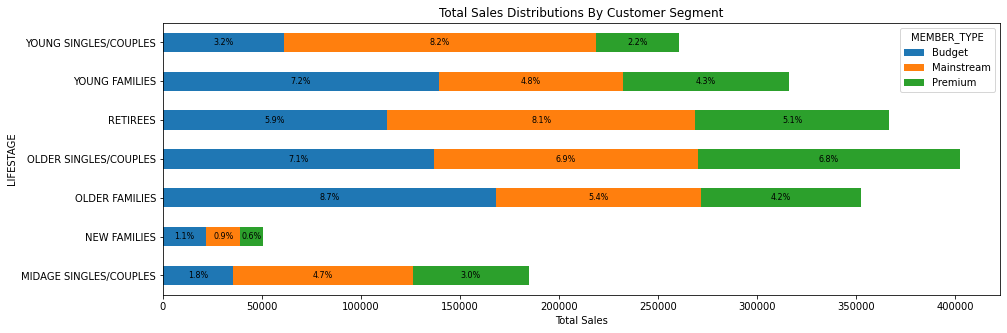

In [57]:
# Get the total sales
total_sales = customers_transaction.loc[customers_transaction['MEMBER_TYPE'] != 'NONE', 'TOTAL_SALES'].sum()

# Filter out the "NONE" type from the data
filtered_data = customers_transaction[customers_transaction['MEMBER_TYPE'] != 'None']

# Plot a breakdown of the total sales by lifestage and member type
total_sales_customers_breakdown = filtered_data.groupby(['LIFESTAGE', 'MEMBER_TYPE'], as_index=False)['TOTAL_SALES'].agg(['sum', 'mean']).unstack('MEMBER_TYPE').fillna(0)

# Create the bar plot
ax = total_sales_customers_breakdown['sum'].plot(kind='barh', stacked=True, figsize=(15, 5))

# Add percentages of the summed total sales as labels to each bar
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    label = width / total_sales * 100
    x = rect.get_x()
    y = rect.get_y()

    label_text = f'{(label):.1f}%'

    # Set label positions 
    label_x = x + width / 2
    label_y = y + height / 2

    # Only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

ax.set_xlabel("Total Sales")
ax.set_title('Total Sales Distributions By Customer Segment')





 we can see that Older Families mainly purchase as Budget, Youngsingles/couples purchases as mainstream, retirees purchases as mainstream. New Families spend less compared to each customer segment on each member type.

In [59]:
# Average units per customer by MEMBER_TYPE and LIFESTAGE
avg_units = customers_transaction.groupby(['MEMBER_TYPE', 'LIFESTAGE']).PROD_QTY.sum() / customers_transaction.groupby(['MEMBER_TYPE', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
avg_units = pd.DataFrame(avg_units, columns = {'Average Unit per Customer'})
avg_units.sort_values(by ='Average Unit per Customer', ascending = False).head()

,,Average Unit per Customer
MEMBER_TYPE,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.804309
Budget,OLDER FAMILIES,9.639572
Premium,OLDER FAMILIES,9.578091
Budget,YOUNG FAMILIES,9.238486
Premium,YOUNG FAMILIES,9.209207


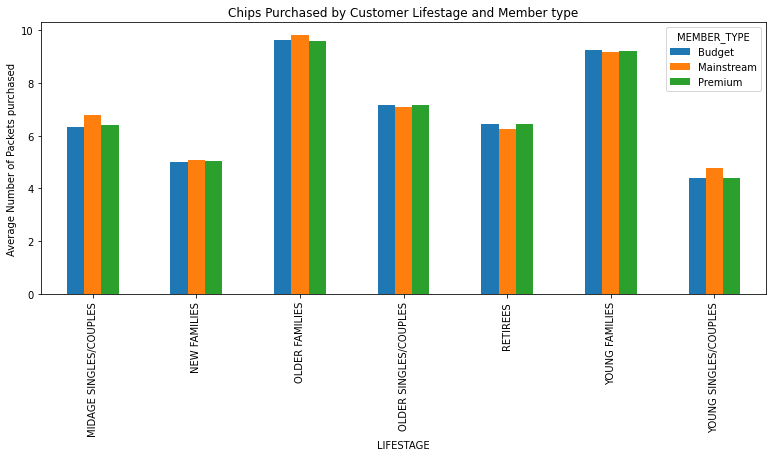

In [60]:
# Filter out the "NONE" type from the data
filtered_data = customers_transaction[customers_transaction['MEMBER_TYPE'] != 'None']

# Plot the average no of chip packets bought per customer by LIFESTAGE and MEMBER_TYPE.
avg_units = filtered_data.groupby(['MEMBER_TYPE', 'LIFESTAGE']).PROD_QTY.sum() / filtered_data.groupby(['MEMBER_TYPE', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
ax = avg_units.unstack('MEMBER_TYPE').fillna(0).plot.bar(stacked = False,figsize=(13, 5))
ax.set_ylabel("Average Number of Packets purchased")
ax.set_title('Chips Purchased by Customer Lifestage and Member type')
plt.xticks(rotation=90)
plt.show()

In this analysis, we focus on understanding how many units of chips are purchased on average by different types of customers across various lifestages. Our findings show a clear trend where Mainstream customers, regardless of their lifestage, tend to purchase more units than those in the Budget or Premium categories.
And also the customers of older families and young families contributes to buy more chips however young singles/couples contributes less compared to these customers.

In [61]:
#Create a column of Unit Price of chips per transaction
customers_transaction["UNIT_PRICE"] = customers_transaction["TOTAL_SALES"] / customers_transaction["PROD_QTY"]

In [62]:
customers_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOTAL_SALES,LIFESTAGE,MEMBER_TYPE,UNIT_PRICE
0,2018-07-01,160,160202,161403,93,Doritos Corn Chip Southern Chicken,150,Doritos,2,7.8,OLDER SINGLES/COUPLES,Mainstream,3.9
1,2018-07-01,262,262071,261713,24,Grain Waves Sweet Chilli,210,Grain Waves,2,7.2,YOUNG SINGLES/COUPLES,Budget,3.6
2,2018-07-01,58,58072,53145,99,Pringles Sthrn FriedChicken,134,Pringles,2,7.4,OLDER SINGLES/COUPLES,Premium,3.7
3,2018-07-01,33,33160,30468,40,Thins Chips Seasonedchicken,175,Thins,2,6.6,OLDER SINGLES/COUPLES,Premium,3.3
4,2018-07-01,9,9341,8808,45,Smiths Thinly Cut Roast Chicken,175,Smiths,2,6.0,RETIREES,Budget,3.0


In [63]:
# Filter out the "NONE" type from the data
filtered_data = customers_transaction[customers_transaction['MEMBER_TYPE'] != 'None']

# Average Price Per Unit by LIFESTAGE and MEMBER_TYPE
avg_price = filtered_data.groupby(["LIFESTAGE","MEMBER_TYPE"])["UNIT_PRICE"].agg('mean').unstack("MEMBER_TYPE")
avg_price

MEMBER_TYPE,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,3.728496,4.000101,3.752915
NEW FAMILIES,3.919251,3.916581,3.871743
OLDER FAMILIES,3.733344,3.727383,3.704625
OLDER SINGLES/COUPLES,3.877022,3.803800,3.887270
RETIREES,3.924883,3.833343,3.921323
YOUNG FAMILIES,3.753659,3.707097,3.752402
YOUNG SINGLES/COUPLES,3.637681,4.071485,3.645518


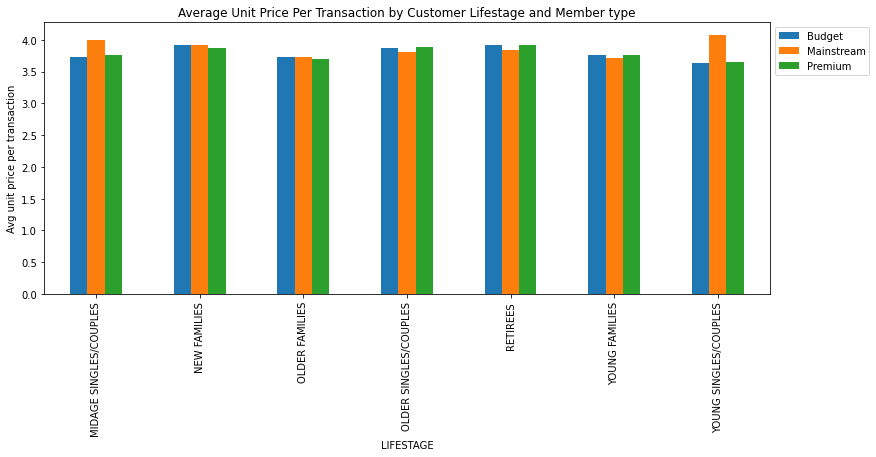

In [64]:
# Filter out the "NONE" type from the data
filtered_data = customers_transaction[customers_transaction['MEMBER_TYPE'] != 'None']
# Plot the distribution of Average unit price per transaction by LIFESTAGE and MEMBER_TYPE
avg_priceperunit = filtered_data.groupby(["LIFESTAGE", "MEMBER_TYPE"], as_index=False)["UNIT_PRICE"].agg(['mean']).unstack("MEMBER_TYPE").fillna(0)
ax = avg_priceperunit['mean'].plot.bar(stacked=False, figsize=(13,5))
ax.set_ylabel("Avg unit price per transaction")
ax.set_title('Average Unit Price Per Transaction by Customer Lifestage and Member type')
plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
plt.show()

The mainstream type for midage singles/couples and young singles/couples are more willing to buy more chips compared to other type of customers such as budget and premium. It is likely that chips is not their choice of snack. 


# CONCLUSION

Generally, sales gradually increase during the holiday season and are the highest the day before Christmas Day, but suddenly decrease right after, so this would be the ideal time for any promotional campaigns or discounts.

The top 3 segments that contributes highest total sales are :

1. Budget Older Families
2. Mainstream Young singles/couples
3. Mainstream Retirees

In conclusion, our analysis provided clear insights into customer purchasing habits. We discovered significant opportunities in targeting mainstream young and mid-age segments with premium offerings. Additionally, understanding the variations in spending across different customer types helps us refine our promotional strategies, ensuring they are as effective as possible. This project not only enhances our marketing approaches but also contributes to better inventory management and customer satisfaction.